In [1]:
import pandas as pd
import numpy as np

class SME():
    
    def __init__(self):
        self.asked = 0
        self.df = self.get()
        
    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')

        X_train['Left'] = y_train
        return X_train
    
    def ask(self, valuedict):
        self.asked += 1
        #  print(self.asked)
        
        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        arr = []
        for prop in valuedict:
            val = valuedict[prop]

            if val is None: 
                continue

            val = f"'{val}'" if isinstance(val,str) else val
            # print(prop, val)
            arr.append(f'{prop} == {val}')

            query = ' and '.join(arr)
        result = self.df.query(query)

        if len(result) == 0:
            raise Exception("I don't know")
        
        return (int)(result['Left'].mean())

In [2]:
sme = SME()

# INPUT ALL EDA ALLOWABLE HERE

## Several Columns are missing data. We will need to make sure to impute them.

In [5]:
X_eda = sme.df
X_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 500000 non-null  int64  
 1   Gender                   500000 non-null  int64  
 2   Distance                 499492 non-null  object 
 3   YearsWorked              500000 non-null  int64  
 4   TrainingHours            500000 non-null  int64  
 5   WorkLifeBalance          500000 non-null  int64  
 6   NumOfProjects            500000 non-null  int64  
 7   JobInvolvement           500000 non-null  int64  
 8   TeamSize                 500000 non-null  int64  
 9   MentorshipReceived       500000 non-null  int64  
 10  TechSkillLevel           500000 non-null  int64  
 11  AttendanceRate           500000 non-null  float64
 12  StressLevel              500000 non-null  int64  
 13  PeerFeedbackScore        500000 non-null  int64  
 14  Annu

In [6]:
X_eda.isnull().sum()[X_eda.isnull().sum() > 0]

Distance             508
SelfReview          1042
SupervisorReview     995
dtype: int64

In [7]:
X_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
RecordId,500000.0,250099.500000,144337.711634,100.000000,125099.750000,250099.500000,375099.250000,500099.000000
Gender,500000.0,0.401232,0.490148,0.000000,0.000000,0.000000,1.000000,1.000000
YearsWorked,500000.0,7.002552,1.868050,0.000000,6.000000,7.000000,8.000000,14.000000
TrainingHours,500000.0,49.483502,28.866048,0.000000,24.000000,50.000000,74.000000,99.000000
WorkLifeBalance,500000.0,3.002836,1.413991,1.000000,2.000000,3.000000,4.000000,5.000000
NumOfProjects,500000.0,10.007036,5.478671,1.000000,5.000000,10.000000,15.000000,19.000000
JobInvolvement,500000.0,2.996948,1.414536,1.000000,2.000000,3.000000,4.000000,5.000000
TeamSize,500000.0,9.998880,5.479373,1.000000,5.000000,10.000000,15.000000,19.000000
MentorshipReceived,500000.0,0.500670,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
TechSkillLevel,500000.0,2.999154,1.414082,1.000000,2.000000,3.000000,4.000000,5.000000


## No Duplicate values, so we are good there

In [9]:
X_eda.duplicated().sum()

0

## Is the data unbalanced?

In [11]:
X_eda['Left'].value_counts()

Left
0    319539
1    180461
Name: count, dtype: int64

## A little, 64% stayed, 36% left.

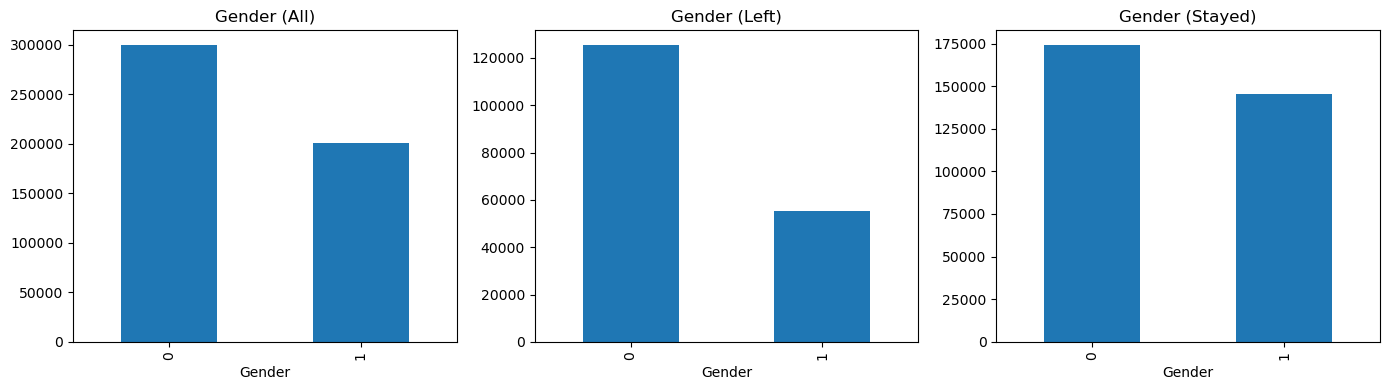

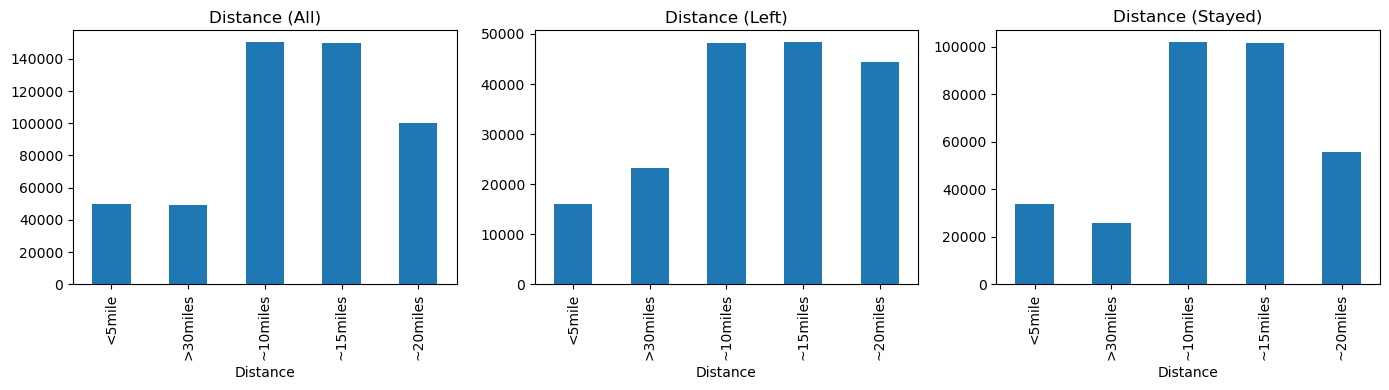

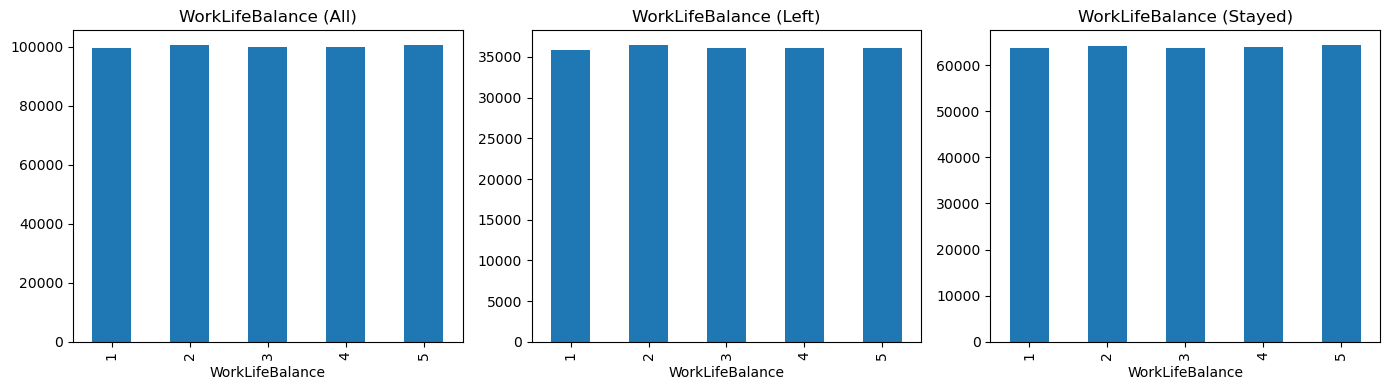

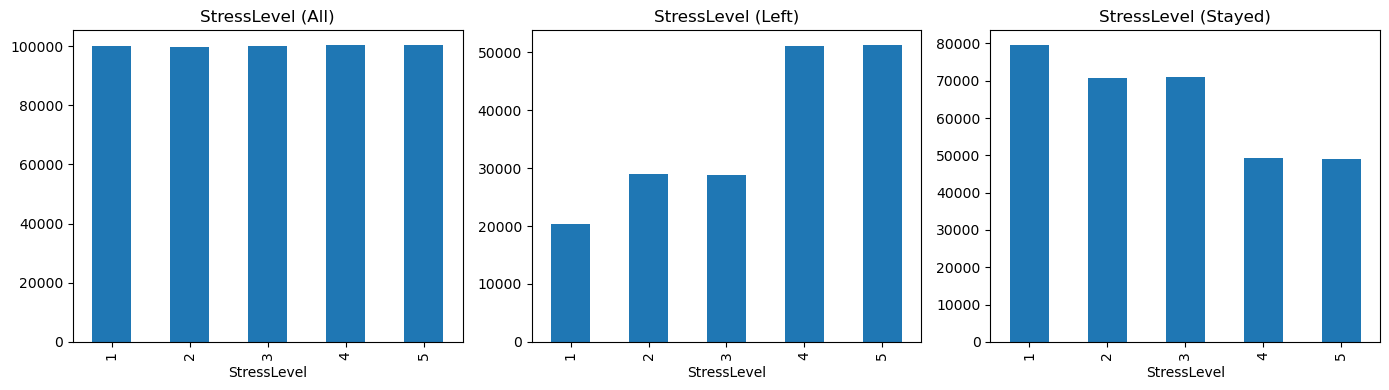

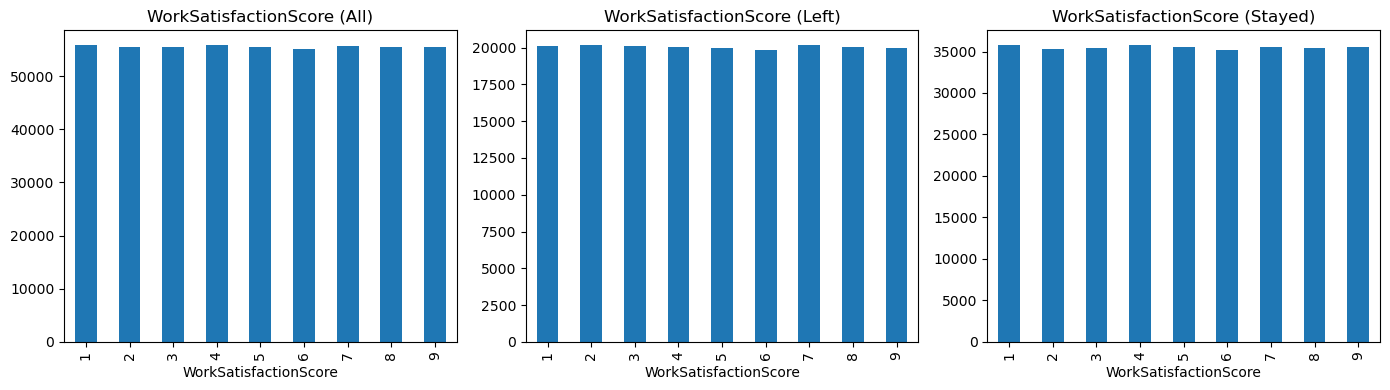

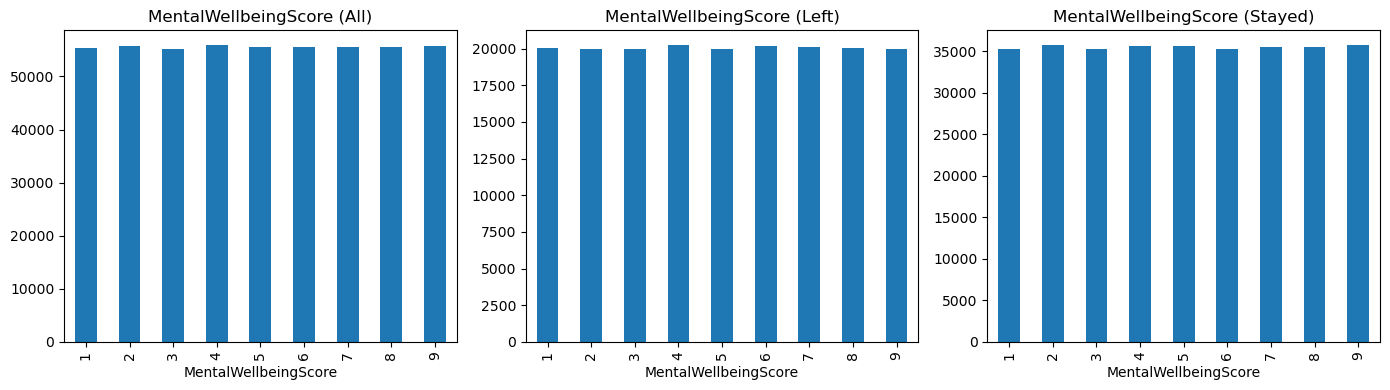

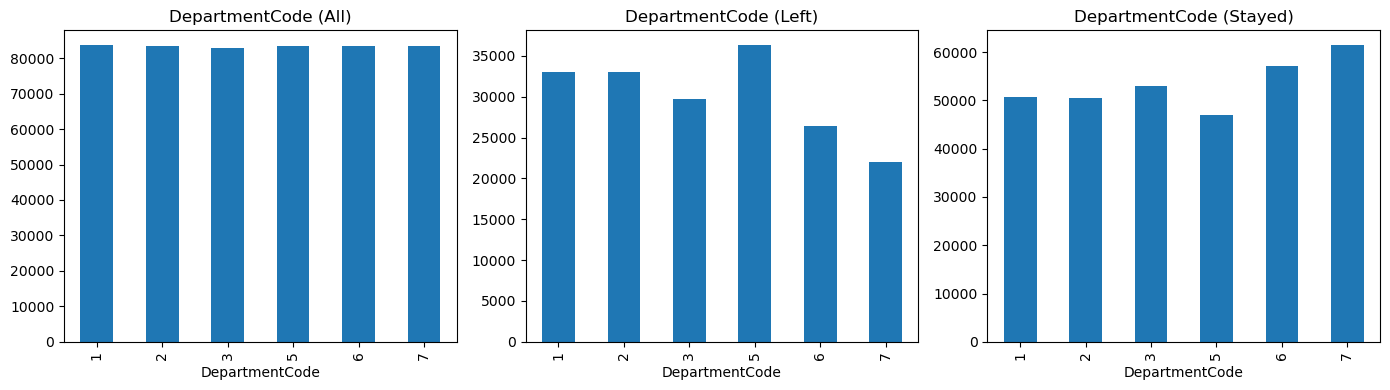

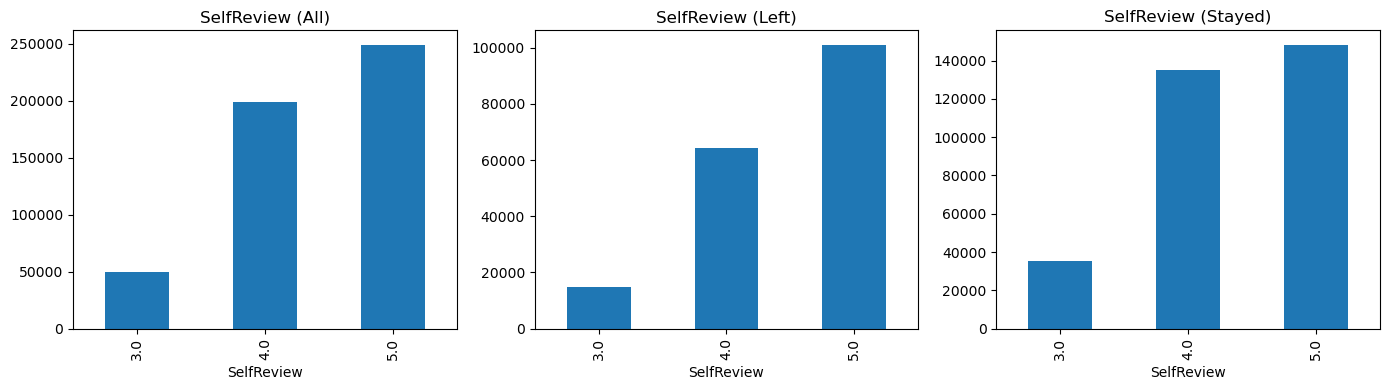

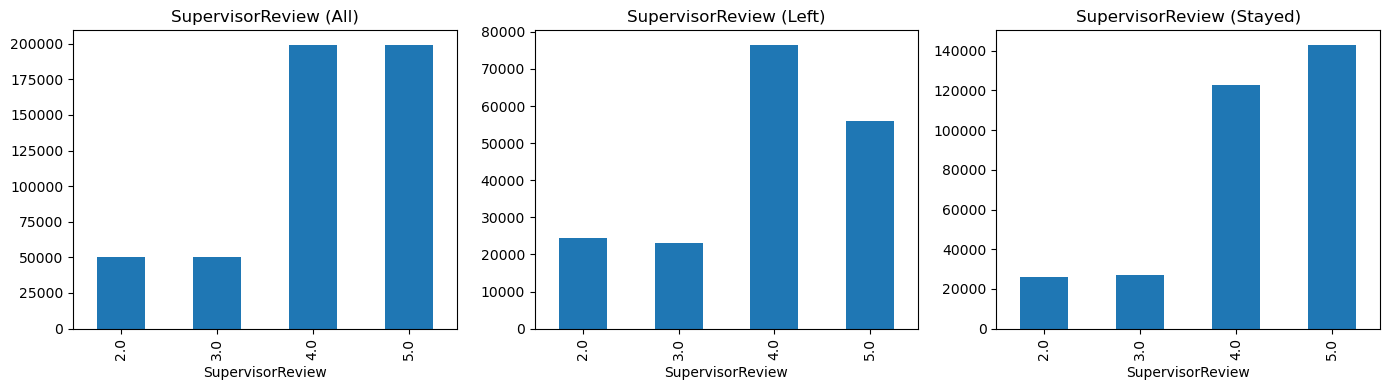

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Convert salaries to numbers
X_eda[['Salary', 'PreviousSalary']] = X_eda[['Salary', 'PreviousSalary']].map(lambda x: x.replace('K', '000') if isinstance(x, str) else x)
X_eda[['Salary', 'PreviousSalary']] = X_eda[['Salary', 'PreviousSalary']].astype(int)

columns_to_keep = [
    'Gender', 'Distance', 'WorkLifeBalance',
    'StressLevel',
    'WorkSatisfactionScore', 'MentalWellbeingScore', 'DepartmentCode',
    'SelfReview', 'SupervisorReview'
]

for col in columns_to_keep:
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    X_eda[col].value_counts().sort_index().plot(kind='bar', ax=axes[0], title=col + ' (All)')
    X_eda[X_eda['Left'] == 1][col].value_counts().sort_index().plot(kind='bar', ax=axes[1], title=col + ' (Left)')
    X_eda[X_eda['Left'] == 0][col].value_counts().sort_index().plot(kind='bar', ax=axes[2], title=col + ' (Stayed)')

    plt.tight_layout()
    plt.show()

In [14]:
import pandas as pd

# Define the columns to check
cols_to_check = [
    'YearsWorked', 'AttendanceRate', 'PreviousSalary', 'Salary',
    'AnnualLeaveDays', 'PeerFeedbackScore', 'StressLevel'
]

# Dictionary to store outlier info
outlier_summary = {}

for col in cols_to_check:
    Q1 = X_eda[col].quantile(0.25)
    Q3 = X_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_eda[(X_eda[col] < lower_bound) | (X_eda[col] > upper_bound)]

    outlier_summary[col] = {
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': outliers.shape[0]
    }

# Display as a DataFrame
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Outlier Count', ascending=False)
print(outlier_df)

                         Q1       Q3       IQR  Lower Bound  Upper Bound  \
YearsWorked            6.00      8.0      2.00         3.00        11.00   
AttendanceRate        84.99     95.0     10.01        69.97       110.01   
PreviousSalary     58000.00  77000.0  19000.00     29500.00    105500.00   
Salary             59000.00  79000.0  20000.00     29000.00    109000.00   
AnnualLeaveDays        7.00     22.0     15.00       -15.50        44.50   
PeerFeedbackScore      2.00      4.0      2.00        -1.00         7.00   
StressLevel            2.00      4.0      2.00        -1.00         7.00   

                   Outlier Count  
YearsWorked               6450.0  
AttendanceRate               0.0  
PreviousSalary               0.0  
Salary                       0.0  
AnnualLeaveDays              0.0  
PeerFeedbackScore            0.0  
StressLevel                  0.0  


In [15]:
from scipy.stats import skew
import pandas as pd

# Define columns to check for skewness
cols_for_skew_check = [
    'AttendanceRate', 'PreviousSalary', 'Salary',
    'AnnualLeaveDays', 'PeerFeedbackScore', 'StressLevel'
]

# Dictionary to store skewness results
skewness_results = {}

# Loop through each column and calculate skewness
for col in cols_for_skew_check:
    skew_val = skew(X_eda[col].dropna())
    skewness_results[col] = round(skew_val, 3)

# Create a readable DataFrame
skew_df = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness'])

# Classify the skew type
skew_df['Skew Type'] = skew_df['Skewness'].apply(
    lambda x: 'Right-skewed' if x > 0.5 else 'Left-skewed' if x < -0.5 else 'Symmetric'
)

# Sort by skew value (optional)
skew_df.sort_values(by='Skewness', ascending=False, inplace=True)

# Display result
print(skew_df)

                   Skewness  Skew Type
Salary                0.313  Symmetric
PreviousSalary        0.305  Symmetric
AttendanceRate        0.001  Symmetric
AnnualLeaveDays       0.000  Symmetric
PeerFeedbackScore    -0.002  Symmetric
StressLevel          -0.003  Symmetric


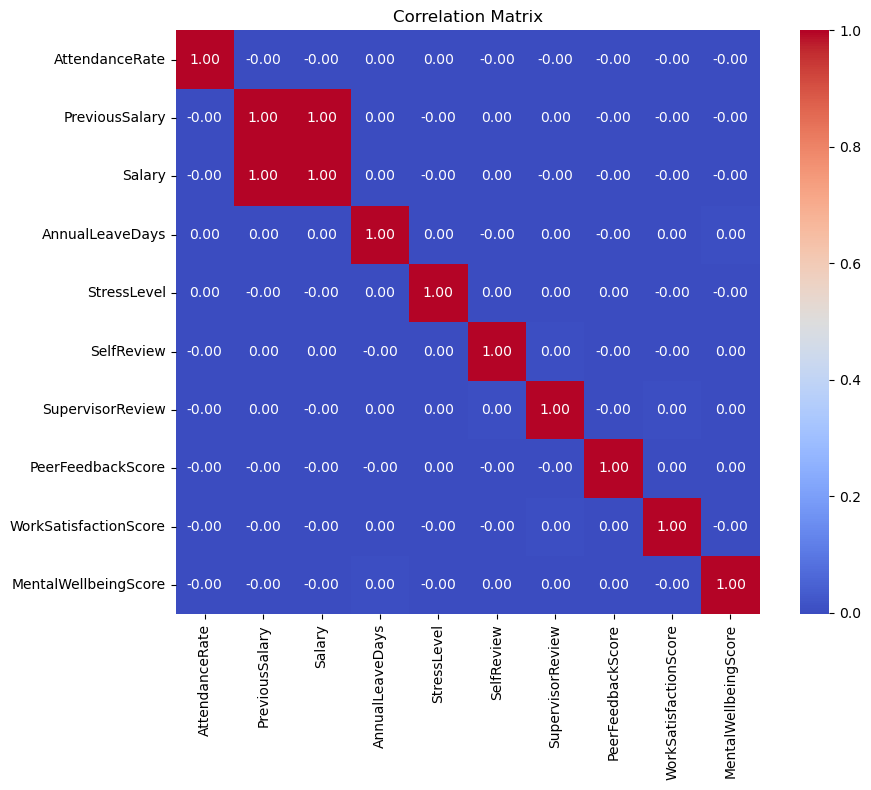


 Variance Inflation Factor (VIF) Summary:
                 Feature          VIF
1         PreviousSalary  5100.561334
2                 Salary  5072.296104
0         AttendanceRate    78.083439
5             SelfReview    39.455048
6       SupervisorReview    18.733016
7      PeerFeedbackScore     5.437435
4            StressLevel     5.436429
9   MentalWellbeingScore     4.706377
8  WorkSatisfactionScore     4.692319
3        AnnualLeaveDays     3.780008


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Select only numeric, continuous/ordinal input features (not target)
cols_to_check = [
    'AttendanceRate', 'PreviousSalary', 'Salary',
    'AnnualLeaveDays', 'StressLevel', 'SelfReview', 'SupervisorReview',
    'PeerFeedbackScore', 'WorkSatisfactionScore', 'MentalWellbeingScore'
]

X_corr = X_eda[cols_to_check].copy()

# Step 2: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Step 3: VIF Calculation
# VIF requires no missing values
X_corr = X_corr.dropna()

# Create DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_corr.columns
vif_data['VIF'] = [variance_inflation_factor(X_corr.values, i) for i in range(X_corr.shape[1])]

# Sort by VIF value
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

# Show result
print("\n Variance Inflation Factor (VIF) Summary:")
print(vif_data)

# End of EDA

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [19]:
n_clusters = 500

sme.df['SelfReview'] = sme.df['SelfReview'].fillna(sme.df['SelfReview'].median())
sme.df['SupervisorReview'] = sme.df['SupervisorReview'].fillna(sme.df['SupervisorReview'].median())
sme.df[['Salary', 'PreviousSalary']] = sme.df[['Salary', 'PreviousSalary']].map(lambda x: x.replace('K', '000') if isinstance(x, str) else x)
sme.df[['Salary', 'PreviousSalary']] = sme.df[['Salary', 'PreviousSalary']].astype(int)

sme.df['Raise'] = (sme.df['Salary'] / sme.df['PreviousSalary']) - 1
sme.df['ReviewDiff'] = sme.df['SelfReview'] - sme.df['SupervisorReview']
sme.df['ReviewOverRaise'] = sme.df['SelfReview'] / (sme.df['Raise'] +.0001)

sme.df['LongDist'] = np.where(sme.df['Distance'].isin(['~20miles', '>30miles']), 1, 0)

sme.df['HighStress'] = np.where(sme.df['StressLevel'] > 3.5, 1, 0)


num = ['HighStress', 'LongDist','Gender', 'SupervisorReview','SelfReview', 'Raise', 'Salary','ReviewOverRaise', 'PreviousSalary'] #, 'LongDist', ReviewOverRaise','ReviewDiff', 'StressLevel'
cat = ['DepartmentCode']

In [20]:
from sklearn.model_selection import train_test_split
X = sme.df.drop('Left', axis=1)
y = sme.df['Left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
featurepreprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num)
    ])
preprocessor = Pipeline(steps=[
    ('features', featurepreprocessor),
    ('pca', PCA(n_components=.9)),#.9
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42, n_init='auto'))
    ])

In [22]:
#X_dist = preprocessor.fit_transform(sme.df[num+cat])
pre = featurepreprocessor.fit_transform(X_train[num+cat]) #sme.df

kmeans = KMeans(n_clusters = n_clusters, n_init='auto')

X_dist = kmeans.fit_transform(pre)
X_dist

#What are the reporesentative points? (e.i the ones closest to each centroid)
representative_idx = np.argmin(X_dist, axis=0)
#representative_idx.shape

#What do the reporesentative points look like?
X_representative = sme.df.iloc[representative_idx]

#Look up the leave/stay value of hte 500 representative points
y_representative= []
for i in representative_idx:
    y_representative.append(sme.ask({'RecordId': i+100})) #All record Id's are 100 more than the index value

#Propagate the label value to each point in the cluster.
y_train_propagated = np.empty(len(X_train), dtype=np.int32) #sme.df
for i in range(n_clusters):
    y_train_propagated[kmeans.labels_ == i] = y_representative[i]

In [23]:
X = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
y= y_train_propagated


In [24]:

y_ans = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')

# Preprocessing for ML Learning Pipeline

## Feature Engineering Pipeline

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X[['Salary', 'PreviousSalary']] = X[['Salary', 'PreviousSalary']].map(lambda x: x.replace('K', '000') if isinstance(x, str) else x)
        X[['Salary', 'PreviousSalary']] = X[['Salary', 'PreviousSalary']].astype(int)
        X['Raise'] = (X['Salary'] / X['PreviousSalary']) - 1
        X['ReviewDiff'] = X['SelfReview'] - X['SupervisorReview']
        X['ReviewOverRaise'] = X['SelfReview'] / (X['Raise'] +.0001)
        X['LongDist'] = np.where(X['Distance'].isin(['~20miles', '>30miles']), 1, 0)
        X['HighStress'] = np.where(X['StressLevel'] > 3.5, 1, 0)
        
        return X

## Rest of Preprocessing Pipeline (categorical and numerical handling)

In [29]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num),
    ("cat", categorical_transformer, cat)
])

full_pipeline = Pipeline(steps=[
    ("feature_engineering", FeatureEngineering()),
    ("preprocessing", preprocessor)
])

## List Out Numerical, Catagorical Features to use

In [31]:
num = ['SupervisorReview',
       'SelfReview', 
       'Raise', 
       'Salary',
       'ReviewOverRaise', 
       'PreviousSalary', 
       'StressLevel', 
       'ReviewDiff']
cat = ['Gender', 
       'DepartmentCode', 
       'Distance']

## Fit Preprocessing Pipeline to training data

In [33]:
X_preprocessed = full_pipeline.fit_transform(X_train)
X_preprocessed_use = X_preprocessed

In [34]:
def optimize_model(model_pipeline: Pipeline, 
                   X_train: pd.DataFrame, 
                   y_train: pd.DataFrame, 
                   param_space: dict, 
                   n_iter: int, 
                   cv_splits=5):
    """
    This function takes in model pipeline, training set, hyperparameter space and number of iterations for RandomizedSearchCV.
    It will then optimize the given model based on the provided hyperparameter set and selected scoring metric, and return the best model.
    It does this by randomly selecting a set of hyperparameters from the provided hyperparameter space and evaluating the model.

    Parameters:
    model_pipeline (Pipeline): A scikit-learn Pipeline object
    X_train (pd.DataFrame): The training feature matrix
    y_train (pd.DataFrame): The response vector for training
    param_space (dict): The hyperparameter space to search
    n_iter (int): The number of iterations to search
    cv_splits (int): The number of cross-validation splits

    Returns:
    RandomizedSearchCV: A RandomizedSearchCV object
    Pipeline: The best model found by the RandomizedSearchCV
    """
        
    random_search = RandomizedSearchCV(
        estimator=model_pipeline,
        param_distributions=param_space,
        n_iter=n_iter,
        scoring='recall', # we choose f1 score
        #cv=timeseries_split, 
        random_state=42,
        n_jobs=-1,
        refit=True,
    )
    
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    return random_search, best_model

In [35]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# this is our hyperparameter space for random forest
param_space = {
    'model__n_estimators': [100, 600, 750, 900],
    'model__max_depth': [10, 15, 20, 25],
    'model__min_samples_split': [6, 7, 8, 15],
    'model__min_samples_leaf': [4, 6, 8, 15],
    'model__bootstrap': [True],
    'model__n_jobs': [-1],
    'model__max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],  
    'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
    'model__random_state': [42],
}

random_forest_pipeline = Pipeline([
    ('model',  RandomForestClassifier(random_state=42))#n_jobs=-1, 
])

random_search, best_model = optimize_model(random_forest_pipeline, X_preprocessed_use[:10000], y_train[:10000], param_space, 5)

CPU times: total: 35.1 s
Wall time: 50.4 s


In [36]:
print(f'Validation Best Score: {random_search.best_score_:.2%}')

Validation Best Score: 83.73%


In [37]:
random_search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=20, max_features=0.9,
                                        max_samples=0.9, min_samples_leaf=4,
                                        min_samples_split=15, n_estimators=750,
                                        n_jobs=-1, random_state=42))])

In [38]:
p = Pipeline([('full', full_pipeline),
              ('clf', RandomForestClassifier(max_depth=20, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=4, min_samples_split=15,
                       n_estimators=750, n_jobs=-1, random_state=42))
             ])

In [39]:
p.fit(X_train, y_train)
p

Pipeline(steps=[('full',
                 Pipeline(steps=[('feature_engineering', FeatureEngineering()),
                                 ('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['HighStress',
                                                                    'LongDist',
                                                                    'Gender',
                                                                    'SupervisorReview',
                                                                    'SelfReview',
                                                                    'Raise',
                                                                    'Salary',
                                                                    'ReviewOverRaise',
                                                                    'PreviousSalary']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['DepartmentCode'])]))])),
                ('clf',
                 RandomForestClassifier(max_depth=20, max_features=0.9,
                                        max_samples=0.9, min_samples_leaf=4,
                                        min_samples_split=15, n_estimators=750,
                                        n_jobs=-1, random_state=42))])

In [40]:
y_pred = p.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     63963
           1       0.80      0.89      0.84     36037

    accuracy                           0.88    100000
   macro avg       0.87      0.88      0.87    100000
weighted avg       0.88      0.88      0.88    100000



y_ans = y_ans.iloc[X_test.index]

print(np.unique(y_test, return_counts=True))
print(np.unique(y_pred, return_counts=True))

np.sum(y_test != y_pred)

np.unique(y_test, return_counts=True)